In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-unemployment/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/covid-19-unemployment/Unemployment in India.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')


In [3]:
df = pd.read_csv('/kaggle/input/covid-19-unemployment/Unemployment in India.csv')
df.head(15)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [4]:
df = pd.read_csv('/kaggle/input/covid-19-unemployment/Unemployment_Rate_upto_11_2020.csv')
df.head(15)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.7400
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.7400
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.7400
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.7400
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.7400
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.7400
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.7400
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.7400
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.7400
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.7400


In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop_duplicates()

In [7]:
df = df.reset_index(drop=True)

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
df.columns = df.columns.str.strip()


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [13]:
df.rename(columns={'Region': 'State'}, inplace=True)


State with the highest unemployment rate: Haryana
Highest unemployment rate: 27.476999999999997
State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 3.8659999999999997


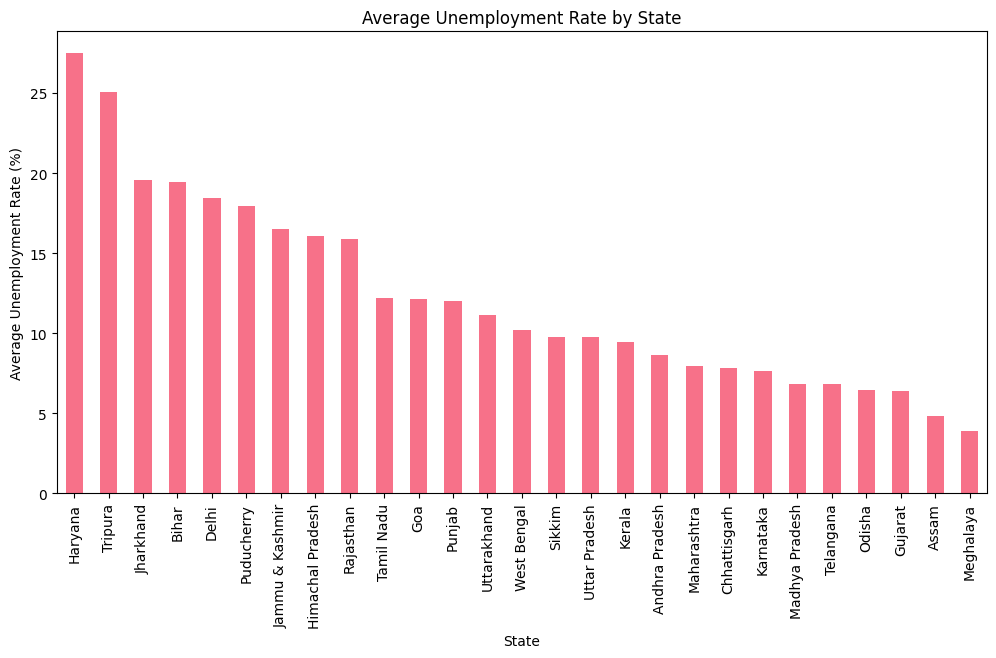

In [14]:
average_unemployment_rate = df.groupby('State')['Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

sns.set_palette("husl")

plt.figure(figsize=(12, 6))
average_unemployment_rate.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.xlabel("State")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

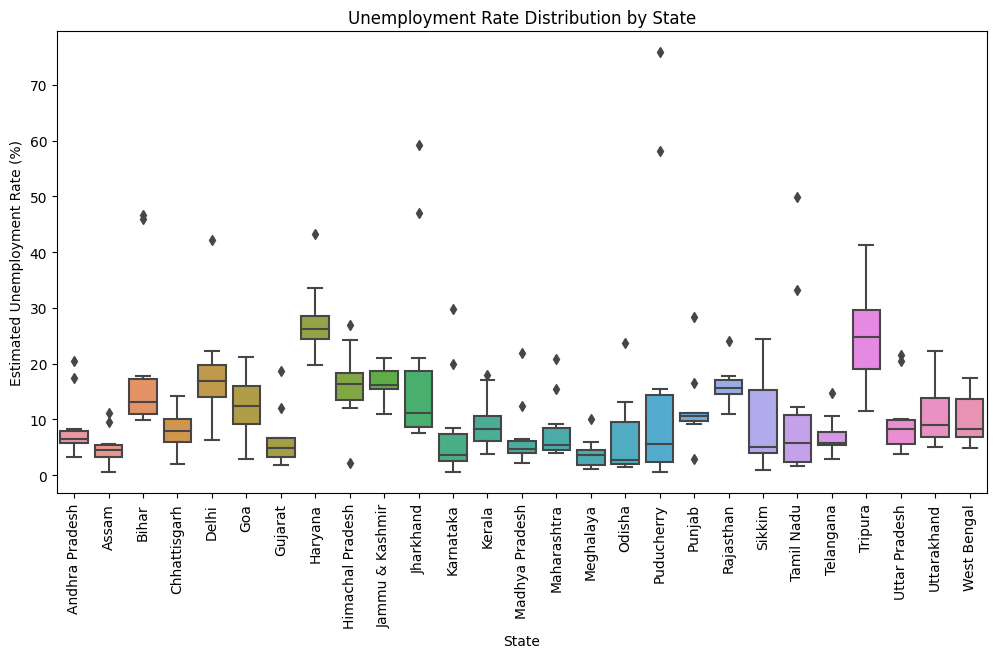

In [15]:
sns.set_palette("husl")

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Unemployment Rate Distribution by State")
plt.xlabel("State")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

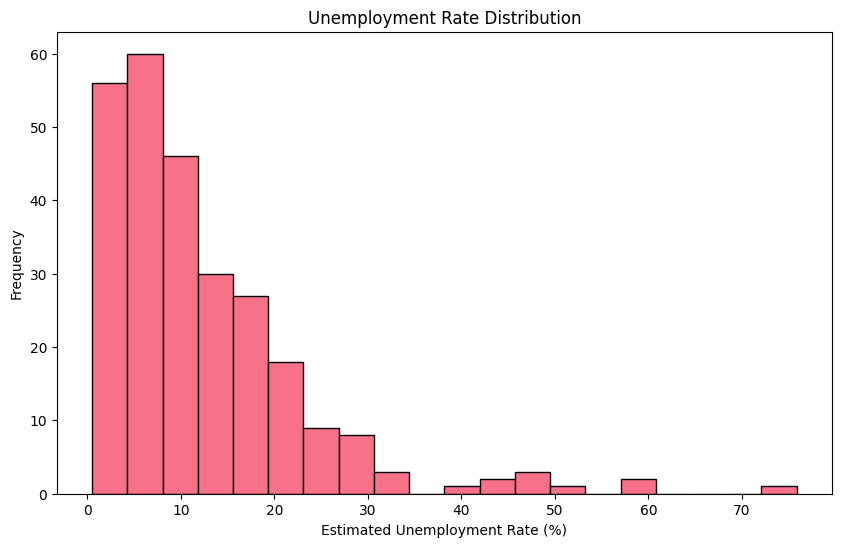

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Estimated Unemployment Rate (%)'], bins=20, edgecolor='k')
plt.title("Unemployment Rate Distribution")
plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

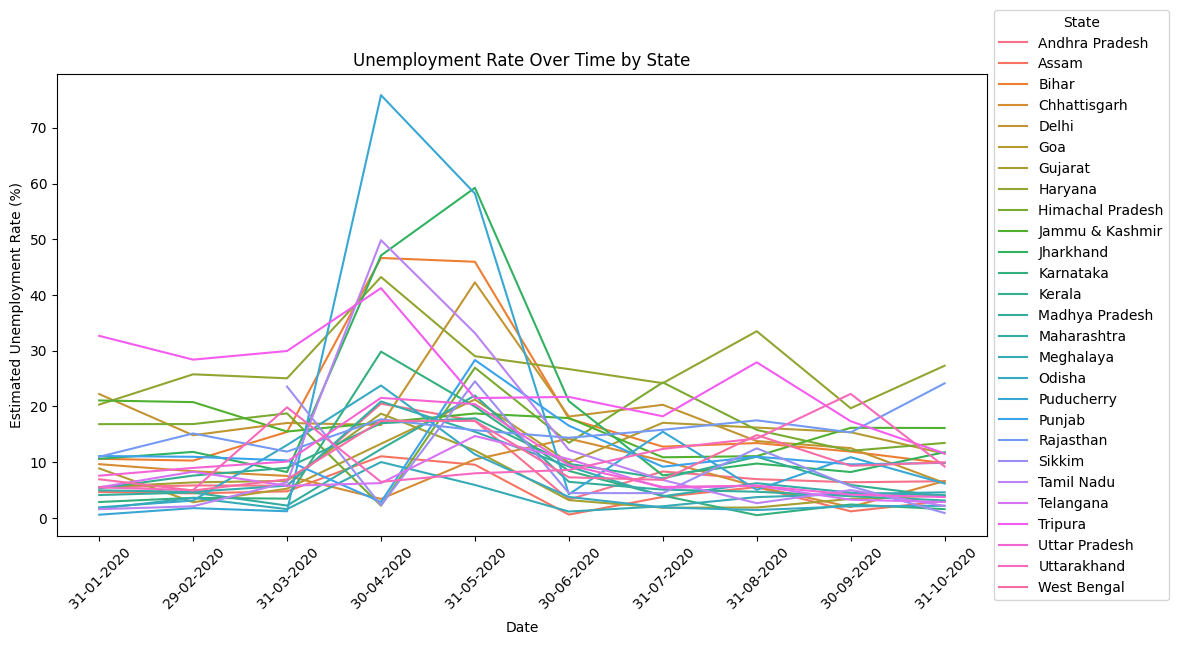

In [17]:
sns.set_palette("tab20")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='State', data=df)
plt.title("Unemployment Rate Over Time by State")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

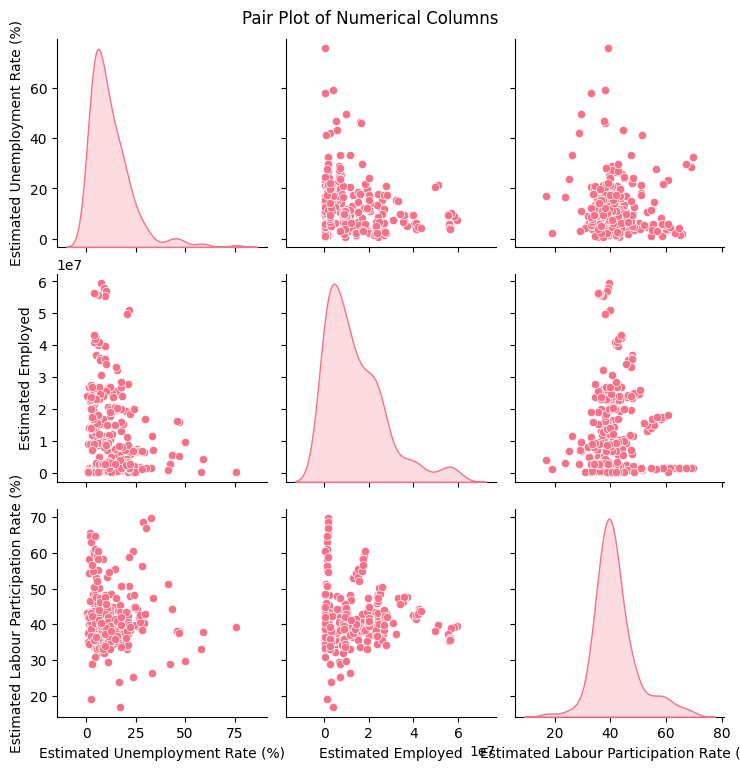

In [18]:
sns.set_palette("husl")

sns.pairplot(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']], diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

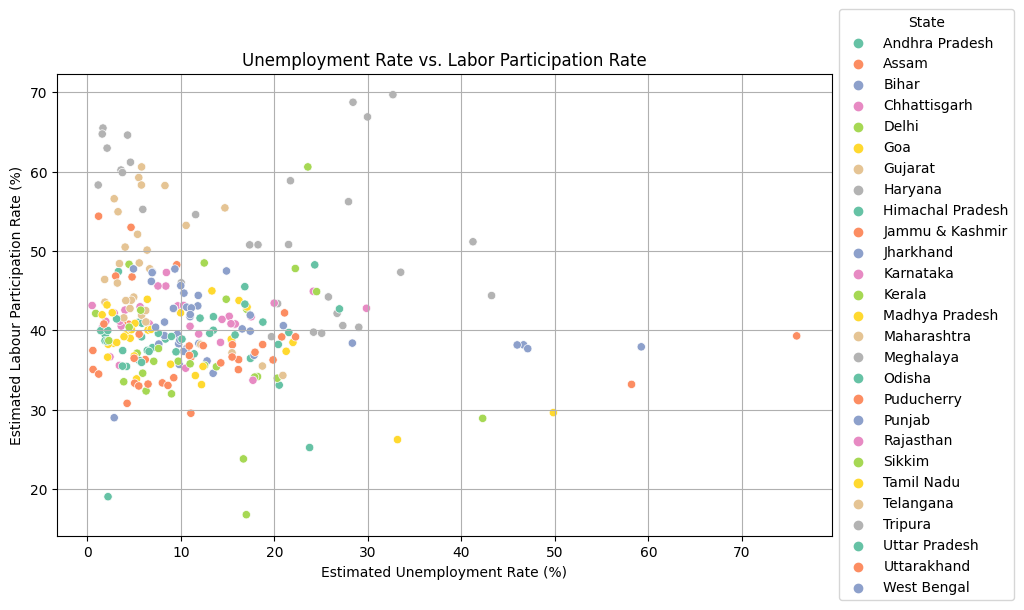

In [19]:
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', data=df, hue='State', palette='Set2', legend='full')
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()

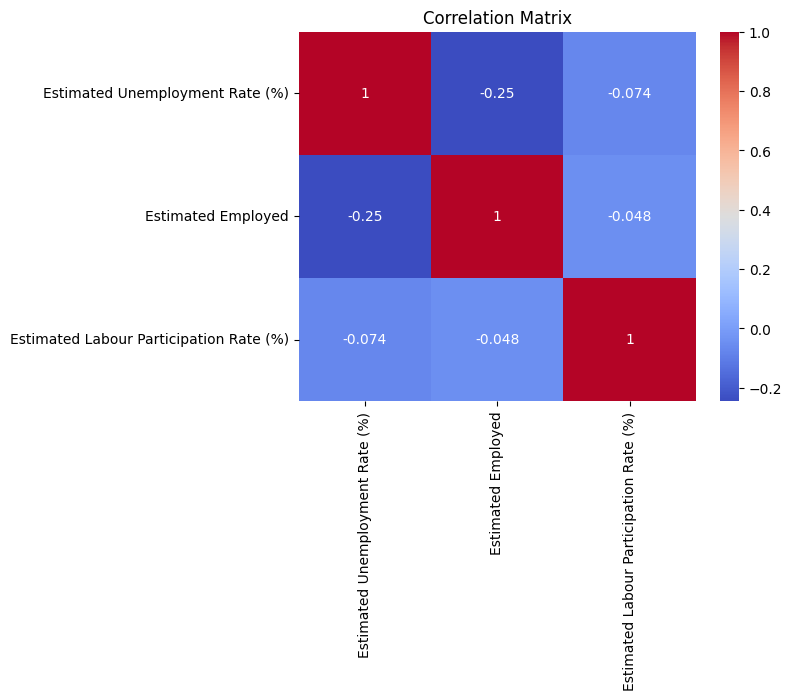

In [20]:
correlation_matrix = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x600 with 0 Axes>

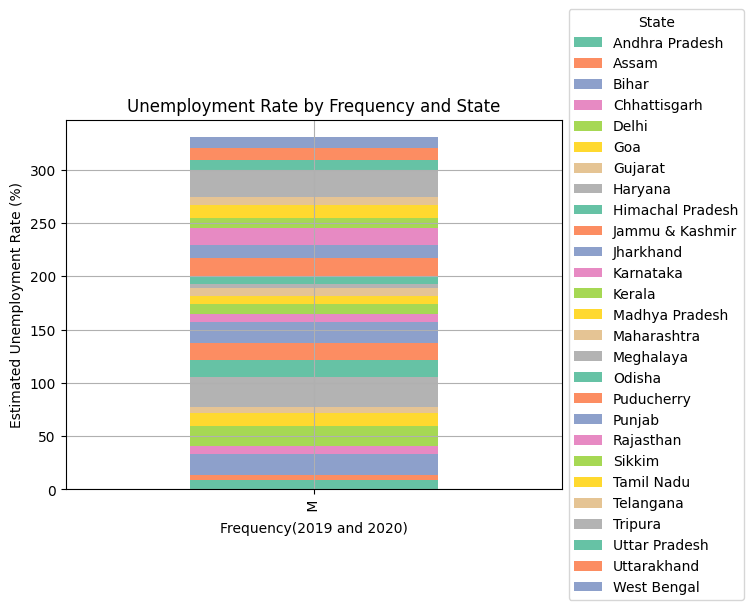

In [21]:
colors = sns.color_palette("Set2", n_colors=len(df['State'].unique()))

grouped_data = df.groupby(['Frequency', 'State'])['Estimated Unemployment Rate (%)'].mean().unstack()

plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Frequency(2019 and 2020)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency and State')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()

In [22]:
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d-%m-%Y')


In [23]:
df.set_index('Date', inplace=True)


In [24]:
df.head()


,State,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,
2020-01-31,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.74
2020-02-29,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.74
2020-03-31,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.74
2020-04-30,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.74
2020-05-31,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.74


In [25]:
print(df.columns)

Index(['State', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [26]:
df_numeric = df.drop(columns=['State', 'Frequency', 'Region.1'])
df_numeric_avg = df_numeric.groupby('Date').mean()


In [27]:
df_numeric_avg


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
Date,,,,,
2020-01-31,9.196538,1.563720e+07,44.626538,22.723342,80.271677
2020-02-29,9.266154,1.548827e+07,44.180769,22.723342,80.271677
2020-03-31,10.782593,1.453866e+07,43.746667,22.901478,80.576881
2020-04-30,22.236154,1.057020e+07,35.297308,22.483142,80.730754
2020-05-31,23.244444,1.150739e+07,39.647778,22.901478,80.576881
2020-06-30,10.911111,1.385739e+07,41.203333,22.901478,80.576881
2020-07-31,9.834444,1.441802e+07,42.274815,22.901478,80.576881
2020-08-31,10.313333,1.442904e+07,42.390741,22.901478,80.576881
2020-09-30,8.705926,1.458784e+07,41.974444,22.901478,80.576881


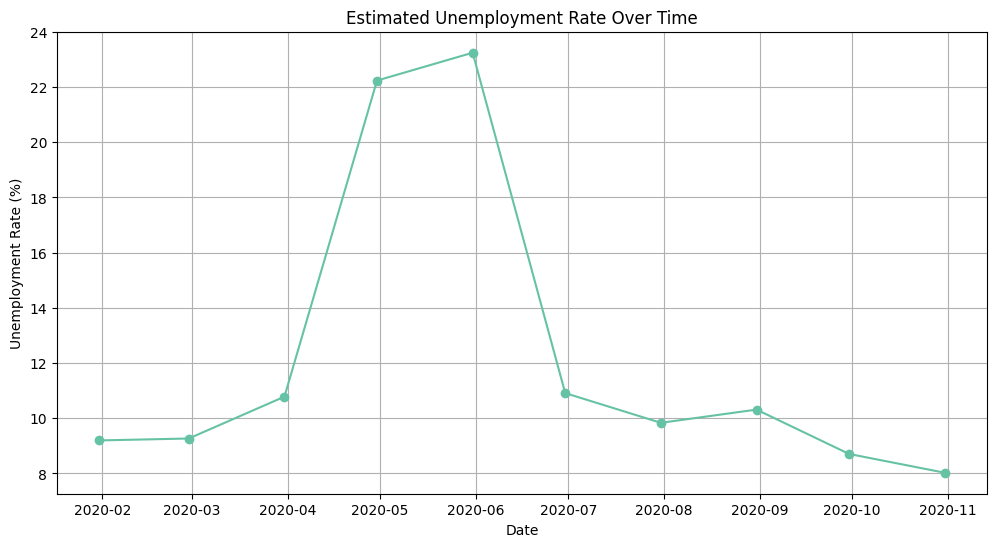

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df_numeric_avg.index, df_numeric_avg['Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


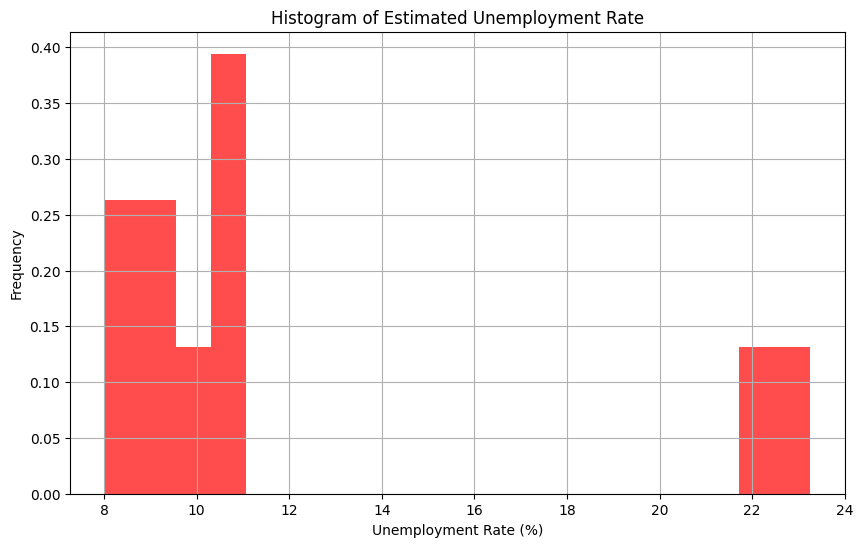

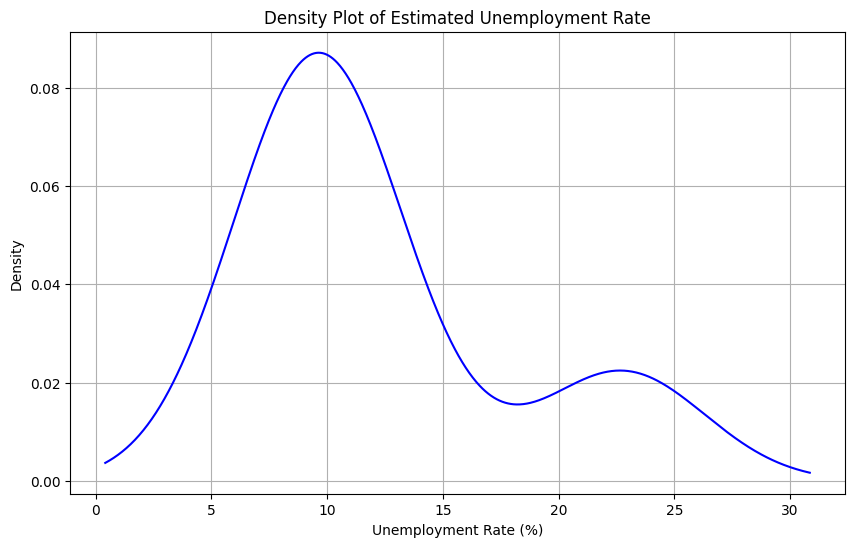

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df_numeric_avg['Estimated Unemployment Rate (%)'], bins=20, density=True, alpha=0.7, color='red')
plt.title('Histogram of Estimated Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Density Plot of Estimated Unemployment Rate
plt.figure(figsize=(10, 6))
df_numeric_avg['Estimated Unemployment Rate (%)'].plot(kind='kde', color='blue')
plt.title('Density Plot of Estimated Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [30]:
df.head()


,State,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,
2020-01-31,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.74
2020-02-29,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.74
2020-03-31,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.74
2020-04-30,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.74
2020-05-31,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.74


In [31]:
df.duplicated().sum()


0

In [32]:
df.isnull().sum()


State                                      0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [33]:
df.columns = df.columns.str.strip()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2020-01-31 to 2020-10-31
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    267 non-null    object 
 1   Frequency                                267 non-null    object 
 2   Estimated Unemployment Rate (%)          267 non-null    float64
 3   Estimated Employed                       267 non-null    int64  
 4   Estimated Labour Participation Rate (%)  267 non-null    float64
 5   Region.1                                 267 non-null    object 
 6   longitude                                267 non-null    float64
 7   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 18.8+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [36]:
import plotly.express as px

# Use the correct column name for the time-related data
fg = px.bar(df, x='Region.1', y='Estimated Unemployment Rate (%)', color='Region.1',
             title='Unemployment rate in 2020',  animation_frame='Frequency',template='plotly')

fg.update_layout(xaxis={'categoryorder': 'total descending'})
fg.show()

In [37]:
fg = px.bar(df, x='Region.1', y='Estimated Unemployment Rate (%)', color='Region.1',
             title='Unemployment rate in 2020-', animation_frame='State', template='plotly')
fg.update_layout(xaxis={'categoryorder': 'total descending'})
fg.show()

In [38]:
import plotly.express as px

line_plot = px.line(df, x='State', y='Estimated Unemployment Rate (%)', color='Region.1',
                    title='Unemployment Rate Over Time', template='plotly')
line_plot.show()

In [39]:
avg_unemployment = df.groupby('State')['Estimated Unemployment Rate (%)'].mean().reset_index()

bar_plot = px.bar(avg_unemployment, x='State', y='Estimated Unemployment Rate (%)',
                   title='Average Unemployment Rate by Region', template='plotly')
bar_plot.show()

In [40]:
scatter_plot = px.scatter(df, x='State', y='Estimated Unemployment Rate (%)',
                          color='Frequency', title='Unemployment Rate vs. Estimated Employed', template='plotly')
scatter_plot.show()

In [41]:
scatter_plot = px.scatter(df, x='Region.1', y='Estimated Unemployment Rate (%)', color='Region.1',
                          title='Unemployment Rate by Region.1 Over Time', animation_frame='Frequency', template='plotly')

scatter_plot.update_xaxes(categoryorder='total descending')

scatter_plot.show()

In [42]:
histogram = px.histogram(df, x='Estimated Labour Participation Rate (%)', color='Frequency',
                         title='Distribution of Labour Participation Rate by Region', template='plotly')
histogram.show()

In [43]:
histogram = px.histogram(df, x='Region.1', y='Estimated Unemployment Rate (%)', color='State',
                         title='Unemployment Rate Distribution by Region.1 Over Time', animation_frame='Frequency', template='plotly')

histogram.update_xaxes(categoryorder='total descending')

histogram.show()
